In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [3]:
img = load_img('dogs-cats/train/cat.0.jpg')  # this is a PIL image

In [4]:
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

In [7]:
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='dogs-cats/preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [10]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 148, 148)      896       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 148, 148)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 72, 72)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 72, 72)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 36, 36)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 34, 34)        18496     
__________

In [14]:
import glob
allNames = glob.glob("dogs-cats/train/*.jpg")

In [23]:
# We create train and validation sets to train the model
# We select 1000 cats and 1000 dogs from the train data and put them in validation and train directories

targetDirectory = 'dogs-cats/data/'
import os
import shutil
src = 'dogs-cats/train'

src_files = os.listdir(src)

catImages = [file for file in src_files if 'cat' in file]
dogImages = [file for file in src_files if 'dog' in file]

In [26]:
for file_name in catImages[0:1000]:
    full_file_name = os.path.join(src, file_name)
    if (os.path.isfile(full_file_name)):
        shutil.copy(full_file_name, targetDirectory+'train/cats')

for file_name in catImages[1000:2000]:
    full_file_name = os.path.join(src, file_name)
    if (os.path.isfile(full_file_name)):
        shutil.copy(full_file_name, targetDirectory+'validation/cats')        

In [27]:
for file_name in dogImages[0:1000]:
    full_file_name = os.path.join(src, file_name)
    if (os.path.isfile(full_file_name)):
        shutil.copy(full_file_name, targetDirectory+'train/dogs')

for file_name in dogImages[1000:2000]:
    full_file_name = os.path.join(src, file_name)
    if (os.path.isfile(full_file_name)):
        shutil.copy(full_file_name, targetDirectory+'validation/dogs') 

In [28]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'dogs-cats/data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'dogs-cats/data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [29]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
125/125 [==============================] - 322s - loss: 0.7010 - acc: 0.5240 - val_loss: 0.6636 - val_acc: 0.6025

In [ ]:
from skimage import color, exposure, transform

In [54]:
src = 'dogs-cats/test1'
test_files = os.listdir(src)

In [66]:
test_files[0:20]

['1.jpg',
 '10.jpg',
 '100.jpg',
 '1000.jpg',
 '10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '1001.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg']

In [63]:
Xnd = []
for image in test_files[0:20]:
    

    img = load_img(os.path.join(src, image))
    x = img_to_array(img)
    y = x[:,:150,:150]
    
    Xnd.append(y)
    
Xndnp = np.array(Xnd)    
    

In [64]:
model.predict_classes(Xndnp)

20/20 [==============================] - 1s


array([[1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0]], dtype=int32)

Populating the interactive namespace from numpy and matplotlib


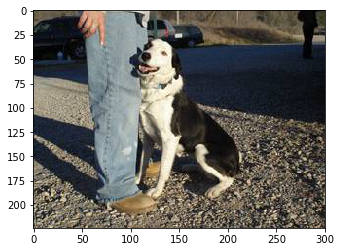

In [68]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('dogs-cats/test1/223.jpg')
imgplot = plt.imshow(img)
plt.show()